In [27]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
sys.path.append('../scripts/')
import cv2
import matplotlib.patches as patches
import math
import scipy
from scipy.ndimage.morphology import binary_closing
from scipy import ndimage
from IPython.display import SVG 
from IPython.display import Pretty 
import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
from icon_helper_functions import *

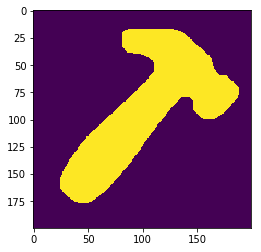

In [65]:
# impath = '../data/Icons_previous/cor'
# impath = '../data/Icons_clean/corkscrew/corkscrew_106698.jpg'
# impath = '../data/Icons_previous/crescent_wrench/crescent%20wrench_449238.jpg'
# CHECK: impath = '../data/Icons_clean/bricklayer_hammer/bricklayer%20hammer_1117273.jpg'
impath = '../outputs/actual_images/newImage.png'
im = PIL.Image.open(impath).resize((200,200))
data = np.array(im)
dat_ = data[:,:]
dat = util.invert(dat_)
plt.imshow(dat)
plt.show()




# imcv = cv2.imread(impath,-1)[:,:,3]
# show(im,'original image')

In [66]:
im.size

(200, 200)

In [67]:
tool_name = impath.split('/')[3]
factor_dict = {'bricklayer_hammer':0.001,'corkscrew':0.005,'garden_spade':0.02,'claw_hammer':0.02,'crescent_wrench':0.005}

In [68]:
try:
    FACTOR = factor_dict[tool_name]
except:
    FACTOR = 0.005

# Invoke helper function to split into parts based on geometry

In [69]:
ims = image_splitter(impath,filled=False,actual=True)

# ims = image_splitter(impath,filled=True)

In [72]:
PARTS = (ims[0],ims[1])

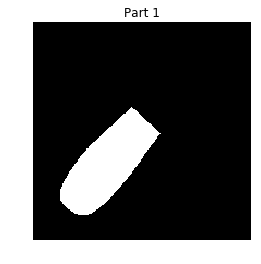

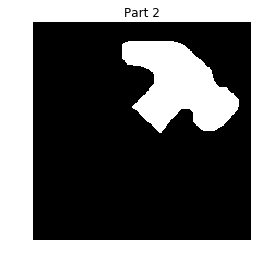

In [73]:
for i in range(len(PARTS)):
    show(PARTS[i],'Part %s'%str(i+1))

In [74]:
def plot_primitive(im_part,title,FACTOR):
    open_cv_image = np.array(im_part) 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    edged = cv2.Canny(open_cv_image, 30, 200)
    _, contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(cnt) for cnt in contours]
    rects = sorted(rects,key=lambda  x:x[1],reverse=True)

    shapes = []
    apps = []
#     print(len(contours))
    if len(contours) < 1:
        print('No contours')
        return -1
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,FACTOR*cv2.arcLength(cnt,True),True)
        if len(approx)==3:
#             print(approx)
#             print('triangle')
            shapes.append('triange')
            apps.append(approx)
        elif len(approx)==4:
#             print(approx)
#             print('4 sided')
            shapes.append('4 sided')
            apps.append(approx)
        else:
#             print(len(approx))
            shapes.append('none')
            apps.append(approx)
#             print('none')
    
    max_area = 0
    for ct in range(len(rects)):
        rect = rects[ct]
        area = rect[2]*rect[3]
        if area > max_area:
            max_area = area
            pos = ct
#     print(pos)
#     print(len(apps))
#     print(apps[pos])
    dummy_img = open_cv_image*0
    clean_plot = cv2.drawContours(dummy_img,apps,pos,(0,255,0),4)
    print(shapes[pos])
    plt.imshow(clean_plot)
    plt.axis('off')
    plt.title(title)
    plt.show()
    return apps,pos,rects,hierarchy

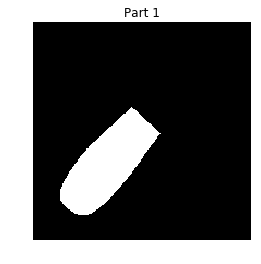

none


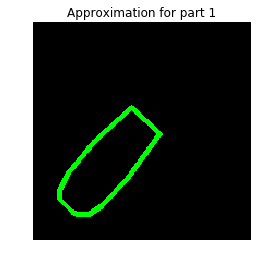

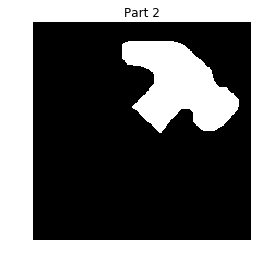

none


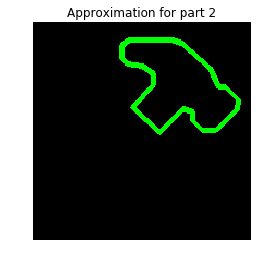

In [75]:
best_shapes = []
svg_start = '<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">'
svg_end = '</svg>'

for i in range(len(PARTS)):
    
    show(PARTS[i],'Part %s'%str(i+1))
    all_shapes,pos,rects,hierarchy = plot_primitive(PARTS[i],'Approximation for part %s'%str(i+1),FACTOR)
    best_shape = all_shapes[pos]
    best_shapes.append(best_shape)
    
    coordinates = ''
    ct = 0
    for point in best_shape:
        if ct > 0:
            coordinates += ' '
        x,y = point[0][0],point[0][1]
        coordinates += '%s,%s'%(x,y)
        ct += 1
    element = '<polygon points="%s" style="stroke:black; fill: white"/>'%coordinates
    
    if i == 0:
        elements = element
    else:
        elements += '\n' + element
    svg_parts = svg_start + '\n' + element + svg_end
    
    f = open('Part_%s.svg'%i,'w')
    print(svg_parts,file = f)
    f.close()
svg_content = svg_start + '\n' + elements + svg_end
f = open('Combined.svg','w')
print(svg_content,file = f)
f.close()

<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<polygon points="81,21 88,16 127,16 136,19 162,42 170,59 176,59 188,71 187,80 167,99 155,99 146,90 146,82 137,79 116,101 91,78 110,57 110,47 100,40 86,38 81,32" style="stroke:black; fill: white"/></svg>



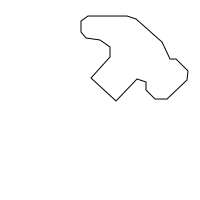

In [76]:
f=open('Part_1.svg')
c = f.readlines()
print(''.join(c))
f.close()
SVG(filename='Part_1.svg')

<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<polygon points="116,102 87,142 63,168 51,176 40,176 36,174 24,162 24,154 32,138 56,109 90,78" style="stroke:black; fill: white"/></svg>



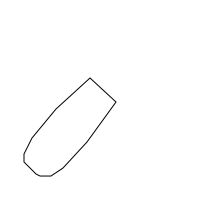

In [77]:
f=open('Part_0.svg')
c = f.readlines()
print(''.join(c))
f.close()
SVG(filename='Part_0.svg')

<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<polygon points="116,102 87,142 63,168 51,176 40,176 36,174 24,162 24,154 32,138 56,109 90,78" style="stroke:black; fill: white"/>
<polygon points="81,21 88,16 127,16 136,19 162,42 170,59 176,59 188,71 187,80 167,99 155,99 146,90 146,82 137,79 116,101 91,78 110,57 110,47 100,40 86,38 81,32" style="stroke:black; fill: white"/></svg>



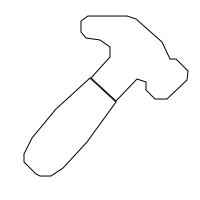

In [78]:
f=open('Combined.svg')
c = f.readlines()
print(''.join(c))
f.close()
SVG(filename='Combined.svg')

In [79]:
# show(im,'original image')

# Adding texture to our SVGs

In [80]:
# texture_impath = '../data/Flat_icon/hammer/139273.png'
texture_impath = '../data/Flat_icon/hammer/222586.png'

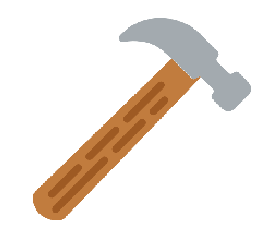

In [81]:
show(texture_impath)

In [82]:
# im = Image.open(impath)
texture_im = Image.open(texture_impath).resize((200,200))
imcv = pil_to_cv(texture_im)

parts = image_splitter(texture_im)

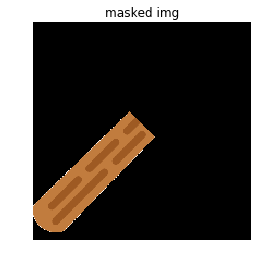

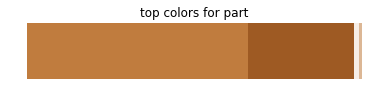

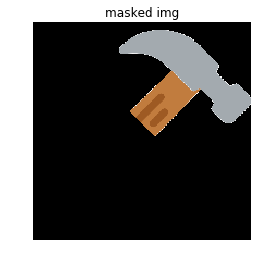

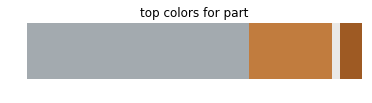

In [83]:
part_colors = []
for part in parts[:2]:
    mask = np.array(part)[:,:,2]
    mask[mask>0] = 255

    res = cv2.bitwise_and(imcv,imcv,mask = mask)

    plt.imshow(res)
    plt.title('masked img')
    plt.axis('off')
    plt.show()

    hist,color,bar = dominant_colors(texture_impath,mask)
    best_color = color[np.argmax(np.asarray(hist))]
    part_colors.append(best_color)
    plt.imshow(bar)
    plt.axis('off')
    plt.title('top colors for part')
    plt.show()

In [84]:
part_colors

[array([192.99041322, 124.07834711,  62.17123967]),
 array([163.34575626, 170.18117519, 175.03944505])]

In [85]:
if tool_name == 'corkscrew':
    part_colors.reverse()

In [86]:
f=open('Combined.svg','r')
content = f.readlines()
f.close()

In [87]:
f = open('Combined_colored.svg','w')
ct = 0
for c in content:
    c = c.rstrip()
    if c.startswith('<polygon'):
        R,G,B = part_colors[ct]
        color_string = 'rgb(%s,%s,%s)'%(int(R),int(G),int(B))
        c = c.replace("white",color_string)
        print(c,file = f)
        ct += 1
    else:
        print(c,file=f)
f.close()   

<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<polygon points="116,102 87,142 63,168 51,176 40,176 36,174 24,162 24,154 32,138 56,109 90,78" style="stroke:black; fill: rgb(192,124,62)"/>
<polygon points="81,21 88,16 127,16 136,19 162,42 170,59 176,59 188,71 187,80 167,99 155,99 146,90 146,82 137,79 116,101 91,78 110,57 110,47 100,40 86,38 81,32" style="stroke:black; fill: rgb(163,170,175)"/></svg>



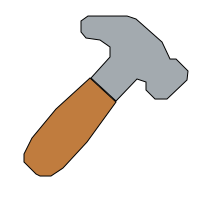

In [88]:
f=open('Combined_colored.svg')
c = f.readlines()
print(''.join(c))
f.close()
SVG(filename='Combined_colored.svg')